<a href="https://colab.research.google.com/github/jhengineer/DeepLearning/blob/main/PCA_PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # -1 :autometically set the dimension, convert 2D to vector

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # there are 10000 components that is total pixels representing the features. Restrict the number to 50
pca.fit(fruits_2d) # calculate Covariance/eigenvalue/eigenvector/score

print(pca.components_.shape) # (주성분 개수, Feature 수만큼 가중치 개) eigenvector 50, that is the directions of inforation are 50

(50, 10000)


In [83]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10)) # 올림 함수
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()


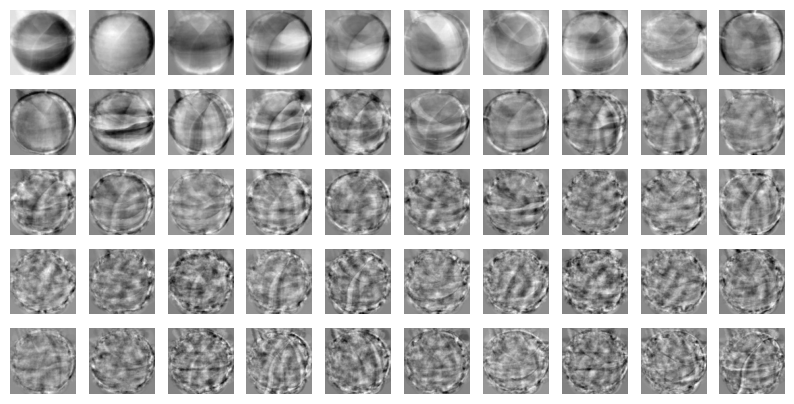

In [84]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) #50x10000을 50x100x100 으로 복원

In [85]:
print(fruits_2d.shape)

(300, 10000)


In [86]:
fruits_pca = pca.transform(fruits_2d) #원본 데이터(fruits_2d)를 PCA의 주성분 축(pca.components_)으로 변환(투영), score 계산작업
print(fruits_pca.shape)

(300, 50)


In [87]:
#원본 데이터 재구성

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

(300, 10000)


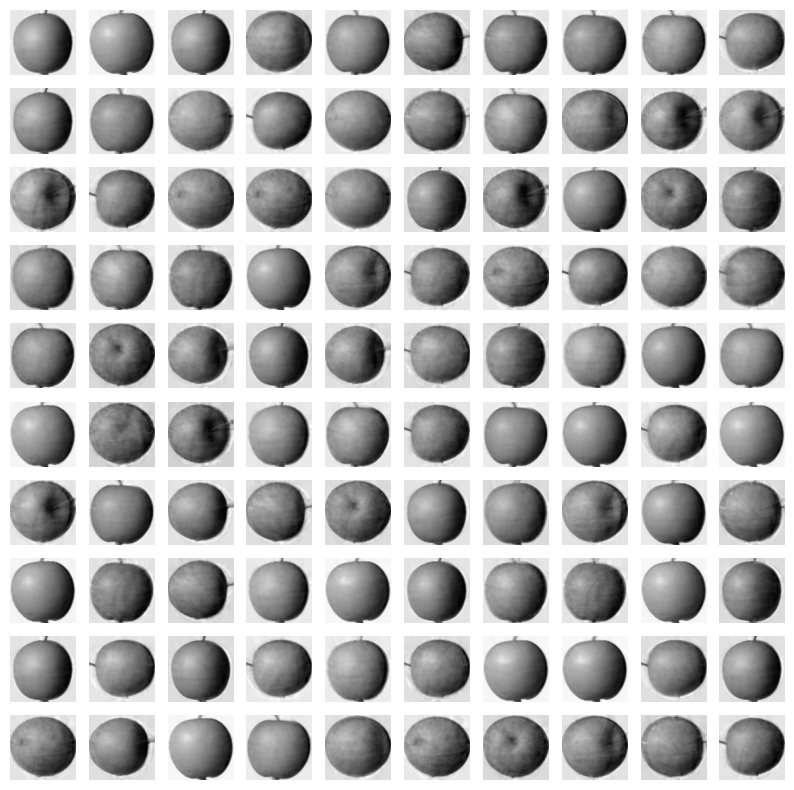

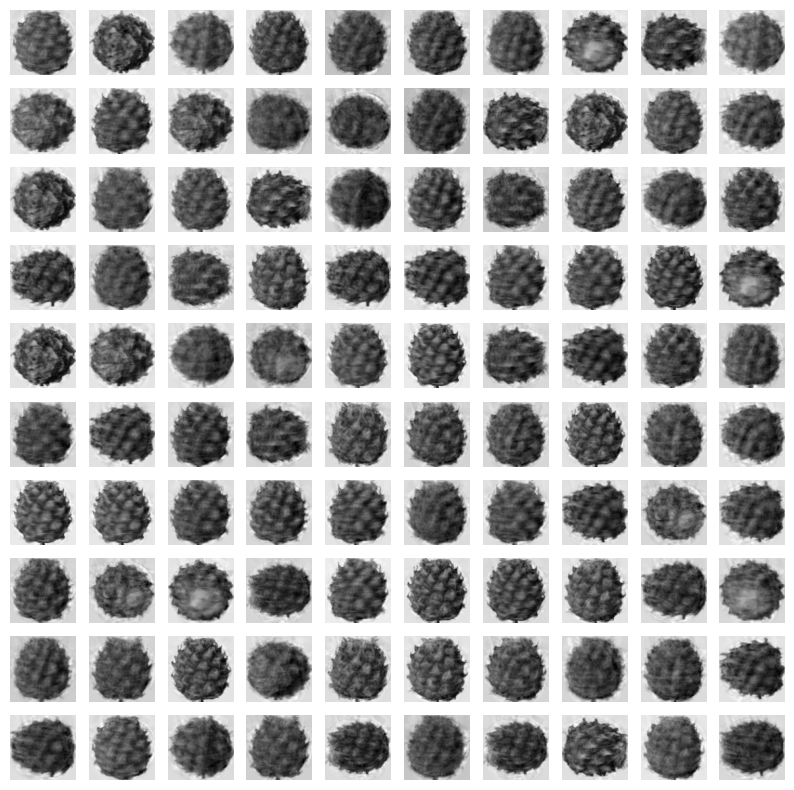

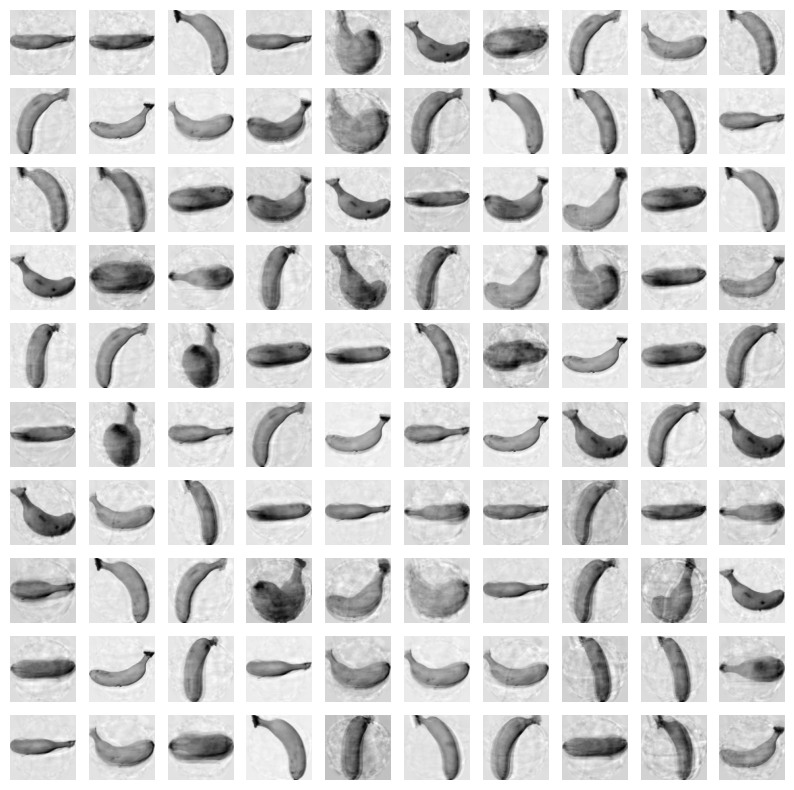

In [88]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

np.sum(pca.explained_variance_ratio_)
PCA가 원본 데이터의 분산(정보)을 얼마나 보존하고 있는지를 확인하는 코드예요.

In [89]:
print(np.sum(pca.explained_variance_ratio_)) # 50개 PCA

0.9214452967679282


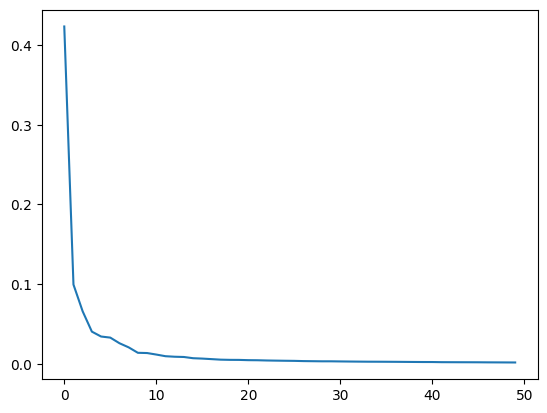

In [90]:
plt.plot(pca.explained_variance_ratio_) # after 10 x axis there's small amount variance.
plt.show()

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 300개 정답 array 0: apple, 1:banana, 2: pinecone

In [92]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


0.9966666666666667
0.8810586929321289


In [93]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # time consuming is big differ form 2d data

0.9966666666666667
0.02438697814941406


In [94]:
pca = PCA(n_components=0.5) #0~1 사이의 실수로 쓰면: 보존할 분산 비율, 50% 설명된 분산정보만 쓴다는건데..
pca.fit(fruits_2d)


PCA(n_components=0.5)

In [95]:
print(pca.n_components_) # 2개 사용시 50%

2


In [96]:
fruits_pca = pca.transform(fruits_2d) # projection 시켜서 score값 얻으면.. 두개의 방향에 투영되니까 2x300
print(fruits_pca.shape)



(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

In [99]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True)) # target is 0,1,2 the number of each class is 110, 99, 91
# 두개 feature만 사용한건데도 꽤 좋은 결과다. 그리고 even 50% variance ratio

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

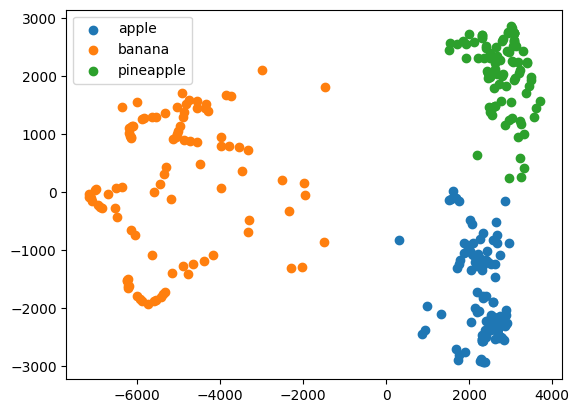

In [101]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()